In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import pickle

In [2]:
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
## Preprocess the data
## Drop irrelevant columns
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


DISTRIBUTION OF ESTIMATED SALARY

Text(0.5, 1.0, 'Distribution of Estimated Salary')

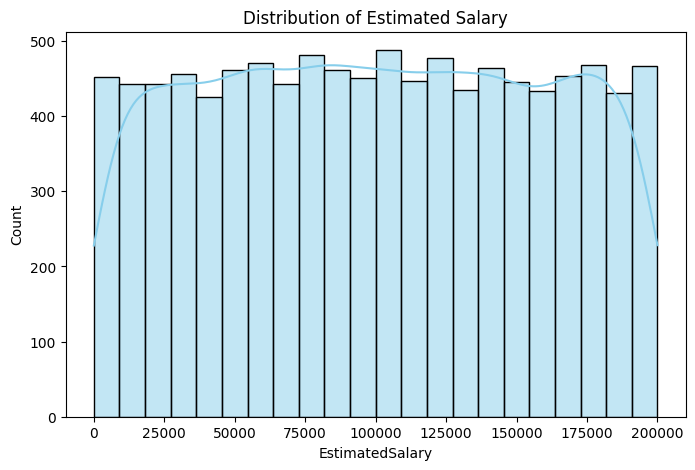

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(data['EstimatedSalary'], kde=True, color='skyblue')
plt.title('Distribution of Estimated Salary')

CORRELATION HEATMAP

Text(0.5, 1.0, 'Feature Correlation with Salary')

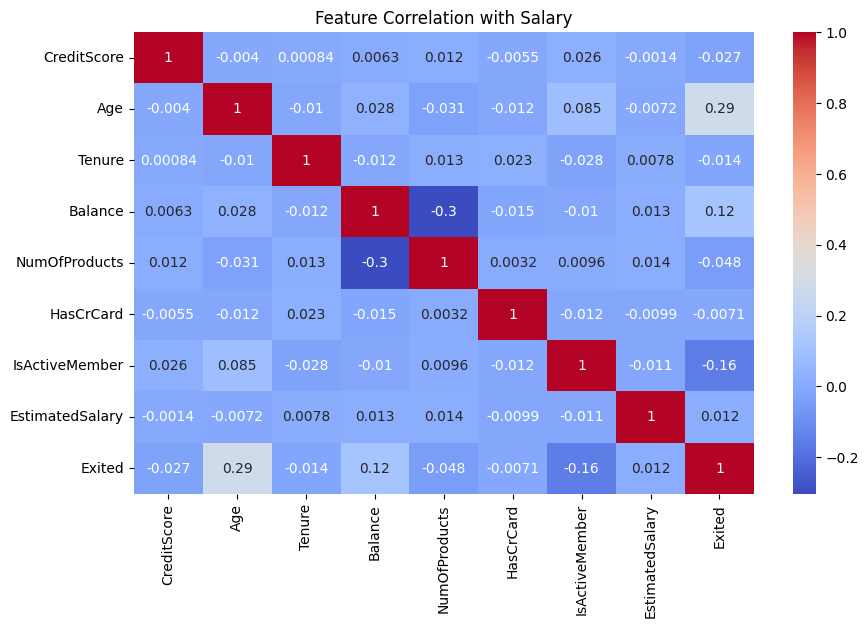

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Salary')

SCATTER PLOTS WITH NUMERIC FEATURES

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

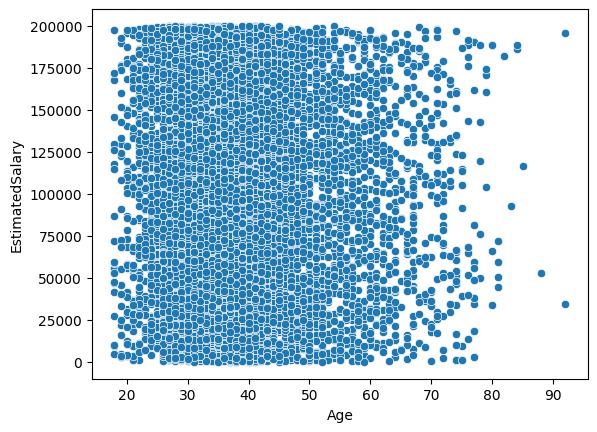

In [13]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=data)

<Axes: xlabel='Balance', ylabel='EstimatedSalary'>

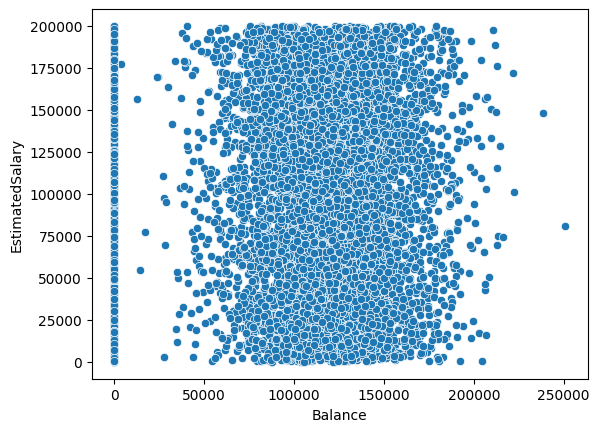

In [8]:
sns.scatterplot(x='Balance', y='EstimatedSalary', data=data)

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

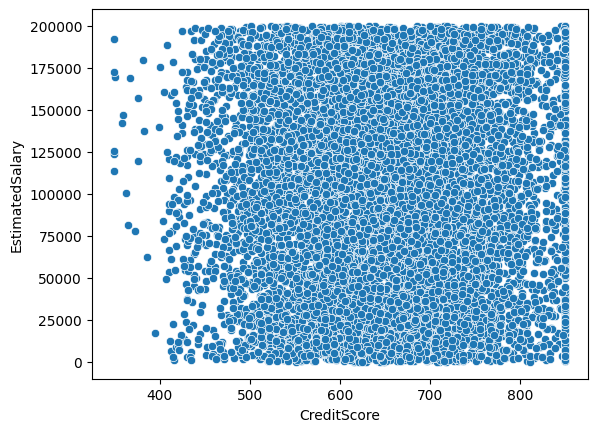

In [9]:
sns.scatterplot(x='CreditScore', y='EstimatedSalary', data=data)

BOXPLOTS FOR CATEGORICAL FEATURES

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

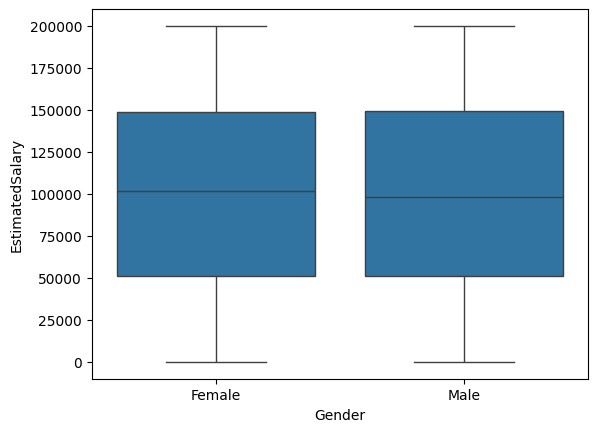

In [10]:
sns.boxplot(x='Gender', y='EstimatedSalary', data=data)

<Axes: xlabel='Geography', ylabel='EstimatedSalary'>

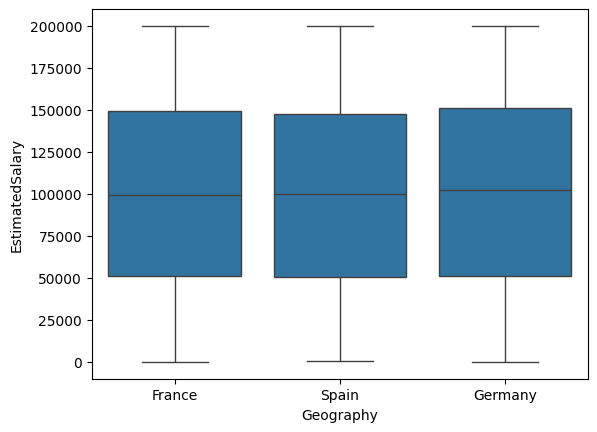

In [11]:
sns.boxplot(x='Geography', y='EstimatedSalary', data=data)

<Axes: xlabel='HasCrCard', ylabel='EstimatedSalary'>

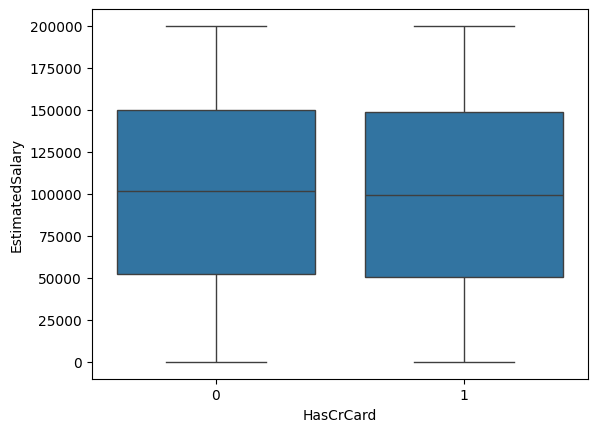

In [12]:
sns.boxplot(x='HasCrCard', y='EstimatedSalary', data=data)

In [5]:
## Encode categorical variables
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])

In [6]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [7]:
## OneHot encode Geography column
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo=OneHotEncoder(sparse_output=False)
geo_encoder=onehot_encoder_geo.fit_transform(data[['Geography']])

In [8]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [10]:
geo_encoded_df=pd.DataFrame(geo_encoder,columns=onehot_encoder_geo.get_feature_names_out(['Geography']))

In [11]:
## Combine one hot encoder columns with the original data
data=pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)

In [12]:
## Divide the dataset into independent and dependent features

X=data.drop('EstimatedSalary',axis=1)
y=data['EstimatedSalary']

In [13]:
## Split the data in training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
## Scale the features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [15]:
## Save the encoders and scalar

with open('label_encoder_gender_reg.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo_reg.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)    
    
with open('scaler_reg.pkl','wb') as file:
    pickle.dump(scaler,file)    

ANN Regression Problem Statement

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [17]:
X_train.shape[1]

12

In [18]:
## Build our ANN Model

model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), ## HL1 connected with input layer
    Dense(32,activation='relu'), ## HL2
    Dense(1) ## Output Layer for regression (By default Linear AF will be applied)
])

## Compile the model

model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mae'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
## Set up the Trensorboard

log_dir='regressionlogs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [21]:
## Set up Early Stopping

early_stopping_callback=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [22]:
## Training the model

history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100


250/250 [==============================] - 2s 4ms/step - loss: 100369.0312 - mae: 100369.0312 - val_loss: 98476.4922 - val_mae: 98476.4922
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 99470.6484 - mae: 99470.6484 - val_loss: 96641.3125 - val_mae: 96641.3125
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 96313.4297 - mae: 96313.4297 - val_loss: 91994.0312 - val_mae: 91994.0312
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 90210.1094 - mae: 90210.1094 - val_loss: 84479.1406 - val_mae: 84479.1406
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 81573.3047 - mae: 81573.3047 - val_loss: 75097.6484 - val_mae: 75097.6484
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 71830.2188 - mae: 71830.2188 - val_loss: 65822.7656 - val_mae: 65822.7656
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 62976.5586 - mae: 62976.558

In [23]:
## Load Tensorboard Extension

%load_ext tensorboard

In [25]:
%tensorboard --logdir regressionlogs/fit 

Reusing TensorBoard on port 6006 (pid 13824), started 0:00:14 ago. (Use '!kill 13824' to kill it.)

In [26]:
## Evaluate the model on the test data

test_loss, test_mae=model.evaluate(X_test,y_test)
print(f'Test MAE: {test_mae}')

63/63 [==============================] - 0s 2ms/step - loss: 50282.0078 - mae: 50282.0078
Test MAE: 50282.0078125


In [27]:
model.save('regression_model.h5')

d:\PROJECTS\ANN Classification\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
